<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/BQm_EV6i0_j80CQZ8vcLvw/SN-web-lightmode.png" width=300 height=300 />


## Lab: Practical Application of Transpose Convolution  

**Estimated time needed: 30 minutes**

This lab will guide you through creating, training, and evaluating models that use transpose convolution layers for tasks such as image reconstruction. 

##### Learning objectives: 

By the end of this lab, you will: 

- Apply transpose convolution in practical scenarios using Keras.  

- Create, compile, train, and evaluate the model 

- Visualize the results  

##### Prerequisites: 

- Basic understanding of Python programming 

- Familiarity with convolutional neural network (CNN) concepts 

- Keras and TensorFlow installed 




#### Steps: 
**Step 1: Import Necessary Libraries**

Before you start, make sure to import the required libraries: TensorFlow and Keras. Keras is included within TensorFlow as `tensorflow.keras`. 


In [1]:
import warnings
warnings.simplefilter('ignore')

!pip install tensorflow==2.16.2 

!pip install matplotlib 
import tensorflow as tf 

from tensorflow.keras.models import Model 

from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, UpSampling2D

import numpy as np 

import matplotlib.pyplot as plt 

2025-01-23 17:11:31.739422: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-23 17:11:31.740634: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-23 17:11:31.745156: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-23 17:11:31.759928: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-23 17:11:31.787334: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

**Explanation:**

 `tensorflow` is the main library for machine learning in Python. 

  `Model, Input, Conv2D, and Conv2DTranspose` are used to create and manipulate the layers in your model. 

  `numpy` and `matplotlib` are used for data manipulation and visualization. 

 
**Step 2: Define the Input Layer**

You need to define the input shape for your model. For simplicity, let's assume you are working with an input image of size 28x28 with 1 channel (grayscale). 

 


In [3]:
input_layer = Input(shape=(28, 28, 1))

**Explanation:**

`Input(shape=(28, 28, 1))` creates an input layer that expects 28x28 grayscale images.


**Step 3: Add convolutional and transpose convolutional layers**

You will add a convolutional layer to extract features, followed by a transpose convolution layer to reconstruct the image. 


In [4]:
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer) 

transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')(conv_layer) 


**Explanation:**

`Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')` creates a convolution layer with 32 filters. 

`Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')` creates a transpose convolution layer for reconstructing the image. 

**Step 4: Create the Model**

Now, you will create the model by specifying the input and output layers.


In [5]:
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

**Explanation:**

`Model(inputs=input_layer, outputs=transpose_conv_layer)` creates a Keras model that connects the input layer to the output layer through the convolutional and transpose convolutional layers.  

**Step 5: Compile the Model**

Before training the model, you need to compile it. You will specify the loss function, optimizer, and evaluation metrics. 


In [6]:
model.compile(optimizer='adam', loss='mean_squared_error')

**Explanation:**

- optimizer=`adam` specifies the Adam optimizer. 

- loss=`binary_crossentropy` specifies the binary cross-entropy loss function, suitable for binary pixel classification.  


**Step 6: Train the Model**

You can now train the model on some training data. For this example, let's assume X_train is our training input data.


In [7]:
# Generate synthetic training data 

X_train = np.random.rand(1000, 28, 28, 1) 

y_train = X_train # For reconstruction, the target is the input 

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2) 

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0794 - val_loss: 0.0619
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0556 - val_loss: 0.0357
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0304 - val_loss: 0.0170
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0144 - val_loss: 0.0083
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0073 - val_loss: 0.0048
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0044 - val_loss: 0.0034
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0019 - val_loss: 0.0018


**Explanation:**

- X_train is a placeholder for your actual training data. 

- y_train is the same as X_train for image reconstruction. 

- model.fit trains the model for a specified number of epochs and batch size.

  
**Step 7: Evaluate the Model**

After training, you can evaluate the model on test data to see how well it performs. 


In [8]:
 # Generate synthetic test data 

X_test = np.random.rand(200, 28, 28, 1) 

y_test = X_test 

loss = model.evaluate(X_test, y_test) 

print(f'Test loss: {loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0018
Test loss: 0.0018270425498485565


**Explanation:**

`X_test` and `y_test` are placeholders for your actual test data. 

`model.evaluate` computes the loss of the model on test data. . 

**Step 8: Visualize the Results**

To better understand the model's performance, let's visualize some reconstructed images.  


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


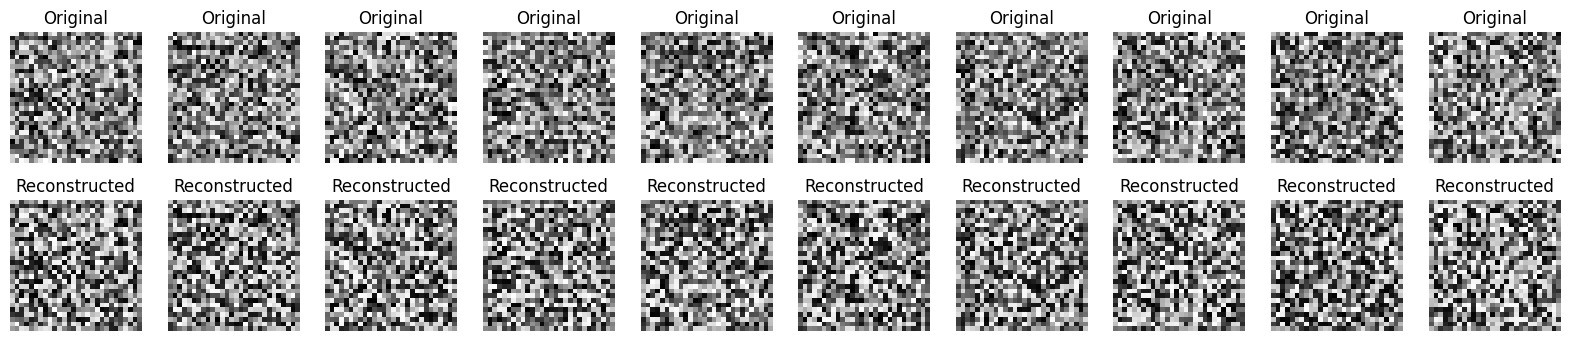

In [9]:
# Predict on test data 
y_pred = model.predict(X_test) 

# Plot some sample images 

n = 10 # Number of samples to display 

plt.figure(figsize=(20, 4))

for i in range(n): 

    # Display original 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original") 
    plt.axis('off') 
    # Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(y_pred[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show() 

**Explanation:**

`model.predict` generates predictions for the test data. 

`plt.imshow` visualizes the original and reconstructed images side by side for comparison. 


### Practice exercises


#### Exercise 1: Experiment with Different Kernel Sizes 

**Objective:** Understand the impact of different kernel sizes on the model's performance. 

**Instructions:**
1. Modify the kernel size of the `Conv2D` and `Conv2DTranspose` layers. 
2. Recompile, train, and evaluate the model. 
3. Observe and record the differences in performance.


In [18]:
input_layer = Input(shape=(30,30,1))
conv_layer = Conv2D(filters=32, kernel_size=(2,2), activation='relu', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(2,2), activation='sigmoid', padding='same')(conv_layer)
model = Model(inputs= input_layer, outputs= transpose_conv_layer)
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
X_train = np.random.rand(1000, 30, 30, 1) 

y_train = X_train # For reconstruction, the target is the input 



In [27]:
X_train

array([[[[0.71072683],
         [0.57649727],
         [0.41813799],
         ...,
         [0.130397  ],
         [0.56703276],
         [0.86864653]],

        [[0.47402279],
         [0.98475442],
         [0.14584043],
         ...,
         [0.34217954],
         [0.24226119],
         [0.64076654]],

        [[0.28193989],
         [0.49803106],
         [0.2288884 ],
         ...,
         [0.34739758],
         [0.77973669],
         [0.18400069]],

        ...,

        [[0.43857564],
         [0.25891377],
         [0.89544679],
         ...,
         [0.47059379],
         [0.10484923],
         [0.10830152]],

        [[0.46102517],
         [0.15974835],
         [0.21446163],
         ...,
         [0.19190112],
         [0.07940654],
         [0.96143535]],

        [[0.80110317],
         [0.85133022],
         [0.4840966 ],
         ...,
         [0.46084982],
         [0.76070385],
         [0.25167333]]],


       [[[0.51155515],
         [0.74311127],
         [0.79

In [21]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2) 

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0809 - val_loss: 0.0707
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0671 - val_loss: 0.0549
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0507 - val_loss: 0.0382
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0348 - val_loss: 0.0254
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0229 - val_loss: 0.0164
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0149 - val_loss: 0.0108
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0098 - val_loss: 0.0074
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0068 - val_loss: 0.0053
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0038 - val_loss: 0.0032


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


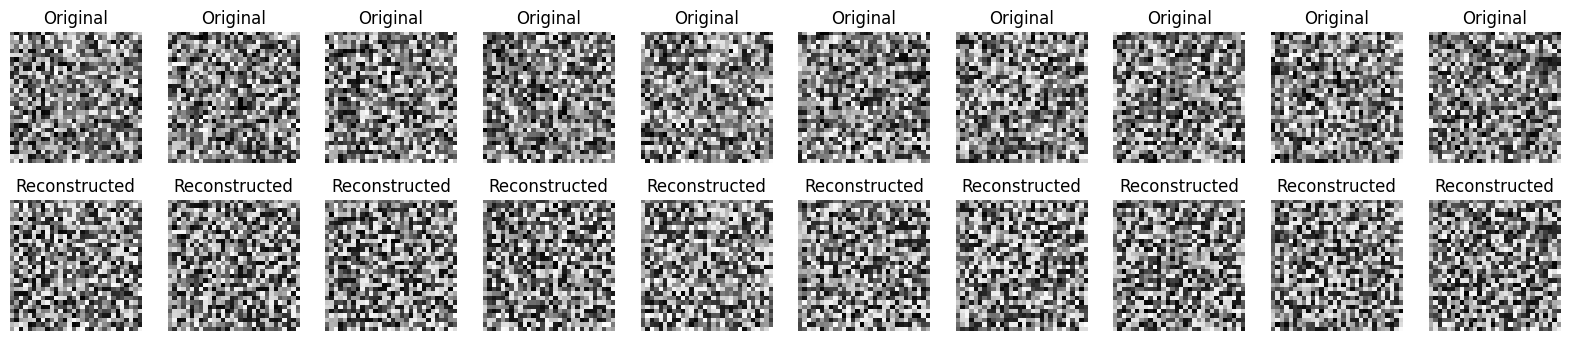

In [25]:
# Predict on test data 
y_pred = model.predict(X_test) 

# Plot some sample images 

n = 10 # Number of samples to display 

plt.figure(figsize=(20, 4))

for i in range(n): 

    # Display original 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(X_test[i].reshape(30, 30), cmap='gray')
    plt.title("Original") 
    plt.axis('off') 
    # Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(y_pred[i].reshape(30, 30), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show() 

In [26]:
X_test = np.random.rand(200, 30, 30, 1) 

y_test = X_test 

loss = model.evaluate(X_test, y_test) 

print(f'Test loss: {loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0032
Test loss: 0.0032087075524032116


In [29]:
from tensorflow.keras.layers import Dropout, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(30, 30, 1))

# Add convolutional and transpose convolutional layers with different kernel sizes
conv_layer = Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(5, 5), activation='sigmoid', padding='same')(conv_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0759 - val_loss: 0.0491
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0408 - val_loss: 0.0198
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0158 - val_loss: 0.0072
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0061 - val_loss: 0.0041
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0038 - val_loss: 0.0032
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0022 - val_loss: 0.0021
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0021
Test loss: 0.002083526225760579


<details>
<summary>Click here for solution</summary> </br>

```python
from tensorflow.keras.layers import Dropout, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional and transpose convolutional layers with different kernel sizes
conv_layer = Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(5, 5), activation='sigmoid', padding='same')(conv_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')


#### Exercise 2: Add Dropout Layers

**Objective:** Add dropout layers to prevent overfitting.

**Instructions:**
1. Add dropout layers after the convolutional layer. 
2. Set the dropout rate to 0.5.
3. Recompile, train, and evaluate the model.


In [33]:
from tensorflow.keras.layers import Dropout, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(30, 30, 1))

# Add convolutional and transpose convolutional layers with different kernel sizes
conv_layer = Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same')(input_layer)
dropout_layer = Dropout(0.5)(conv_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(5, 5), activation='sigmoid', padding='same')(dropout_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0781 - val_loss: 0.0450
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0406 - val_loss: 0.0179
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0203 - val_loss: 0.0085
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0135 - val_loss: 0.0059
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0111 - val_loss: 0.0049
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0100 - val_loss: 0.0043
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0093 - val_loss: 0.0039
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0088 - val_loss: 0.0036
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0084 - val_loss: 0.0033
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0081 - val_loss: 0.0031
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0030
Test loss: 0.003047115867957473


<details>
<summary>Click here for solution</summary> </br>

```python
from tensorflow.keras.layers import Dropout, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional, dropout, and transpose convolutional layers
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
dropout_layer = Dropout(0.5)(conv_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')(dropout_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')


#### Exercise 3: Use Different Activation Functions 

**Objective:** Experiment with different activation functions and observe their impact on model performance. 

**Instructions:**
1. Change the activation function of the convolutional and transpose convolutional layers to `tanh`. 
2. Recompile, train, and evaluate the model.


In [34]:
from tensorflow.keras.layers import Dropout, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(30, 30, 1))

# Add convolutional and transpose convolutional layers with different kernel sizes
conv_layer = Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same')(input_layer)
dropout_layer = Dropout(0.5)(conv_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(5, 5), activation='tanh', padding='same')(dropout_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.2839 - val_loss: 0.0765
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0779 - val_loss: 0.0490
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0522 - val_loss: 0.0264
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0345 - val_loss: 0.0159
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0265 - val_loss: 0.0120
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0226 - val_loss: 0.0100
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0204 - val_loss: 0.0087
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0188 - val_loss: 0.0077
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0173 - val_loss: 0.0071
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0162 - val_loss: 0.0067
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0066
Test loss: 0.006623206660151482


In [41]:
#For 3D image do the following: 

In [36]:
from tensorflow.keras.layers import Dropout, Conv2D, Conv2DTranspose, Input, Conv3DTranspose, Conv3D, MaxPool3D
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(30, 30, 30, 1))

# Add convolutional and transpose convolutional layers with different kernel sizes
conv_layer = Conv3D(filters=32, kernel_size=(5, 5, 5), activation='relu', padding='same')(input_layer)
dropout_layer = Dropout(0.5)(conv_layer)
transpose_conv_layer = Conv3DTranspose(filters=1, kernel_size=(5, 5, 5), activation='sigmoid', padding='same')(dropout_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')



In [38]:
X_train = np.random.rand(1000, 30, 30, 30, 1) 

y_train = X_train # For reconstruction, the target is the input 


In [39]:
X_test = np.random.rand(100, 30, 30,30, 1) 

y_test = X_test # For reconstruction, the target is the input 


In [40]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - loss: 0.0659 - val_loss: 0.0179
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - loss: 0.0185 - val_loss: 0.0060
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - loss: 0.0107 - val_loss: 0.0044
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - loss: 0.0092 - val_loss: 0.0039
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - loss: 0.0086 - val_loss: 0.0035
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - loss: 0.0083 - val_loss: 0.0032
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - loss: 0.0080 - val_loss: 0.0031
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - loss: 0.0078 - val_loss: 0.0029
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - loss: 0.0076 - val_loss: 0.0028
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - loss: 0.0074 - val_loss: 0.0027
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 870ms/step - loss: 0.0027
Test loss: 0.00266599771566689


In [42]:
# Predict on test data 
y_pred = model.predict(X_test) 



4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 855ms/step


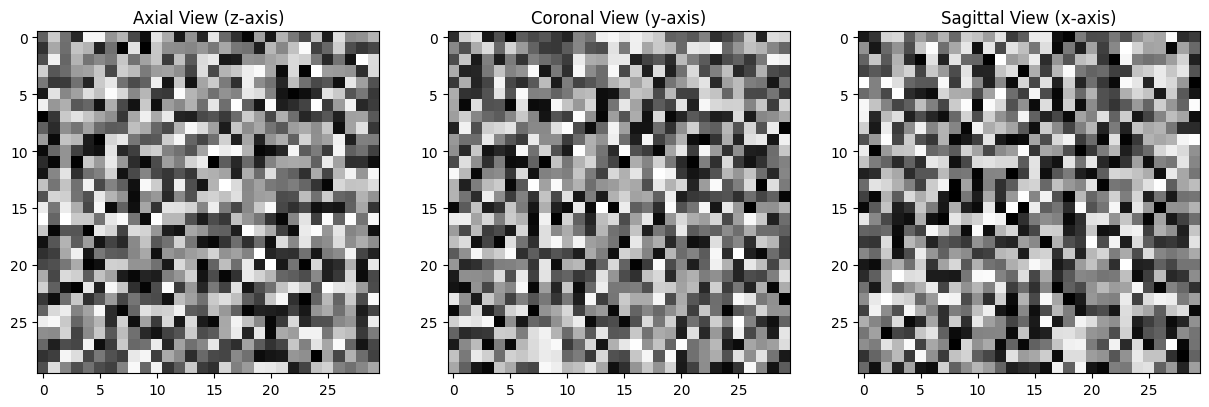

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Random 3D dataset
#X_test = np.random.rand(100, 30, 30, 30, 1)

# Select a 3D image to visualize
image_index = 0  # Pick the first 3D image
image = X_test[image_index, :, :, :, 0]

# Visualizing slices along each axis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Axial slice (along z-axis)
axes[0].imshow(image[:, :, image.shape[2] // 2], cmap="gray")
axes[0].set_title("Axial View (z-axis)")

# Coronal slice (along y-axis)
axes[1].imshow(image[:, image.shape[1] // 2, :], cmap="gray")
axes[1].set_title("Coronal View (y-axis)")

# Sagittal slice (along x-axis)
axes[2].imshow(image[image.shape[0] // 2, :, :], cmap="gray")
axes[2].set_title("Sagittal View (x-axis)")

plt.show()


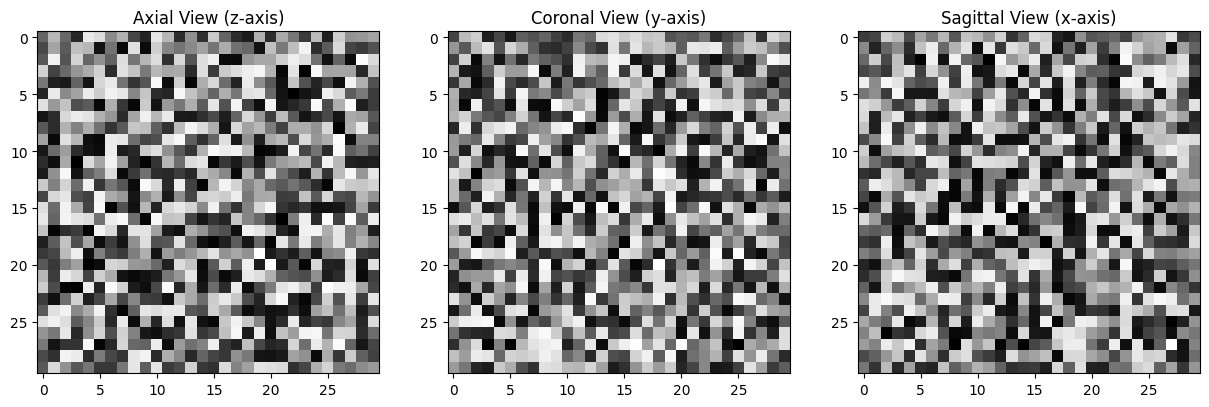

In [45]:
# Select a 3D image to visualize
image_index = 0  # Pick the first 3D image
image = y_pred[image_index, :, :, :, 0]

# Visualizing slices along each axis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Axial slice (along z-axis)
axes[0].imshow(image[:, :, image.shape[2] // 2], cmap="gray")
axes[0].set_title("Axial View (z-axis)")

# Coronal slice (along y-axis)
axes[1].imshow(image[:, image.shape[1] // 2, :], cmap="gray")
axes[1].set_title("Coronal View (y-axis)")

# Sagittal slice (along x-axis)
axes[2].imshow(image[image.shape[0] // 2, :, :], cmap="gray")
axes[2].set_title("Sagittal View (x-axis)")

plt.show()

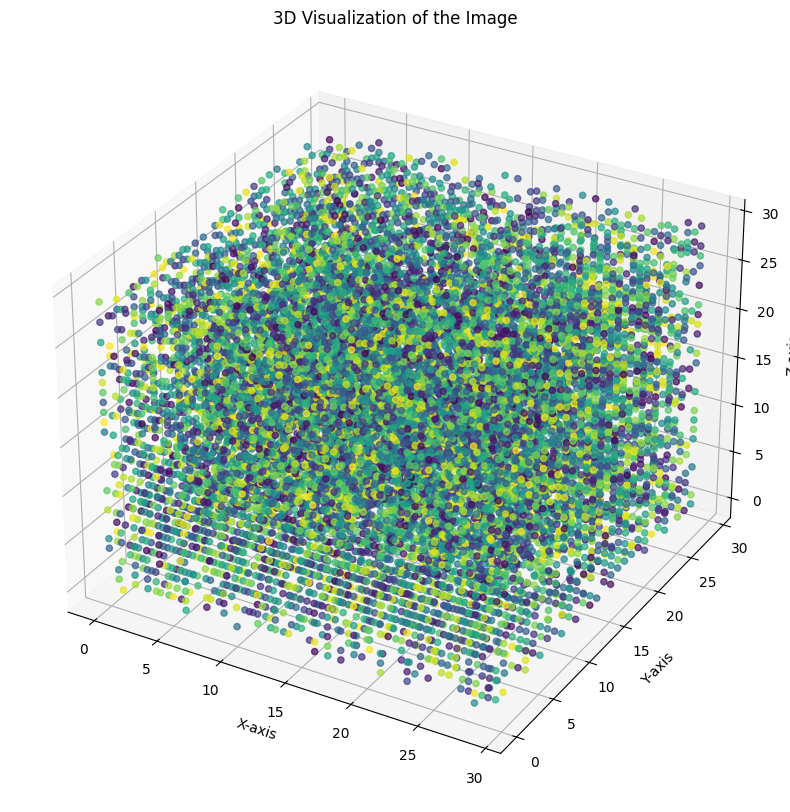

In [44]:
from mpl_toolkits.mplot3d import Axes3D

# Threshold the image for 3D plotting
threshold = 0.5
x, y, z = np.where(image > threshold)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

# Plot the surface points
ax.scatter(x, y, z, c=image[x, y, z], cmap="viridis", marker="o", alpha=0.7)

ax.set_title("3D Visualization of the Image")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.show()


In [ ]:
# Threshold the image for 3D plotting
threshold = 0.5
x, y, z = np.where(image > threshold)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

# Plot the surface points
ax.scatter(x, y, z, c=image[x, y, z], cmap="viridis", marker="o", alpha=0.7)

ax.set_title("3D Visualization of the Image")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.show()


<details>
<summary>Click here for solution</summary> </br>

```python

from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional and transpose convolutional layers with different activation functions
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='tanh', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='tanh', padding='same')(conv_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')



### Conclusion:

By completing this lab, you have successfully created, trained, and evaluated a simple neural network model using transpose convolution for image reconstruction. This exercise provided hands-on experience with Keras and practical applications of transpose convolution layers. Continue experimenting with different architectures and datasets to deepen your understanding and skills in deep learning with Keras. 


Copyright © IBM Corporation. All rights reserved.
